In [183]:
#disable warnings for certain old libraries:
import warnings
warnings.filterwarnings('ignore')

In [184]:
#importing data 
import pandas as pd
import numpy as np
import matplotlib as nlp
tweets=pd.read_csv('tweetsmillion.csv', engine='python', names=["sentiment", "id", "date", "flag", "user", "tweet"])
tweets

,sentiment,id,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [185]:
#truncating the dataset to only a sample 5000 rows for convinience
tweetsmall=tweets.sample(n=5000)
tweetsmall

,sentiment,id,date,flag,user,tweet
1401505,4,2054561743,Sat Jun 06 07:37:11 PDT 2009,NO_QUERY,ientje89,@natalieloves Good morning! how are you?
1278596,4,2001445168,Tue Jun 02 00:54:36 PDT 2009,NO_QUERY,DaWaBZ94,@geekoo Yyeppp ! Except for gravity on the 580...
613292,0,2225308461,Thu Jun 18 10:33:46 PDT 2009,NO_QUERY,MHerdez,I am not feeling well at all. I want to go home
135113,0,1836431918,Mon May 18 07:59:21 PDT 2009,NO_QUERY,shell9683,computer class with no rey
1072723,4,1966634043,Fri May 29 18:07:16 PDT 2009,NO_QUERY,gunandagirl,@mackb1991 I just need to wait to hear the tim...
...,...,...,...,...,...,...
1368711,4,2050658113,Fri Jun 05 19:03:57 PDT 2009,NO_QUERY,eric_walter,"Choir shows at SSHS are 80% music, 20% dance a..."
922856,4,1754524617,Sun May 10 06:33:58 PDT 2009,NO_QUERY,VictoriaCecilia,hoping her mom has a great day today
575605,0,2211120064,Wed Jun 17 12:27:31 PDT 2009,NO_QUERY,MGCK,@anniemacdjseen that therapy bit in the liason...
888887,4,1687434455,Sun May 03 08:41:17 PDT 2009,NO_QUERY,jlm1779,I feel good with my progress and it doesn't ma...


In [186]:
tweetsmall.shape

(5000, 6)

In [187]:
#preprocessing dataframe

#step 1 : Selecting only necessary columns (sentiment and text) and removing unnecessary columns
tweets5000=tweetsmall[['sentiment','tweet']]
#step 2 : Currently (0=negative,4=Positive) changing the notation to (0=Negative,1=Positive) because it will make it easier to understand
tweets5000['sentiment'] = tweets5000['sentiment'].replace(4,1)
tweets5000

,sentiment,tweet
1401505,1,@natalieloves Good morning! how are you?
1278596,1,@geekoo Yyeppp ! Except for gravity on the 580...
613292,0,I am not feeling well at all. I want to go home
135113,0,computer class with no rey
1072723,1,@mackb1991 I just need to wait to hear the tim...
...,...,...
1368711,1,"Choir shows at SSHS are 80% music, 20% dance a..."
922856,1,hoping her mom has a great day today
575605,0,@anniemacdjseen that therapy bit in the liason...
888887,1,I feel good with my progress and it doesn't ma...


In [188]:
tweets5000[['tweet']]

,tweet
1401505,@natalieloves Good morning! how are you?
1278596,@geekoo Yyeppp ! Except for gravity on the 580...
613292,I am not feeling well at all. I want to go home
135113,computer class with no rey
1072723,@mackb1991 I just need to wait to hear the tim...
...,...
1368711,"Choir shows at SSHS are 80% music, 20% dance a..."
922856,hoping her mom has a great day today
575605,@anniemacdjseen that therapy bit in the liason...
888887,I feel good with my progress and it doesn't ma...


In [189]:
#preprocessing (cleaning tweets)

import preprocessor as p

#To do tweet preprocessing. We need to first define a preprocess function 
def preprocess_tweet(row):
    tweet = row['tweet']
    tweet = p.clean(tweet)
    return tweet

# Now we will use pandas apply to apply it on each value of 'text'
tweets5000['tweet'] = tweets5000.apply(preprocess_tweet, axis=1) #with this we can see that that tweets are now clean without hashtags and twitter handles (@users)
tweets5000.head(5)


,sentiment,tweet
1401505,1,Good morning! how are you?
1278596,1,"Yyeppp ! Except for gravity on the , nokia sho..."
613292,0,I am not feeling well at all. I want to go home
135113,0,computer class with no rey
1072723,1,I just need to wait to hear the times of the o...


In [190]:
#Now that the tweet is clean. We will now apply normal text preprocessing to conver to lowercase , remove punctuation and white spaces
tweets5000['tweet'] = tweets5000['tweet'] .str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
tweets5000.head(5)

,sentiment,tweet
1401505,1,good morning how are you
1278596,1,yyeppp except for gravity on the nokia should ...
613292,0,i am not feeling well at all i want to go home
135113,0,computer class with no rey
1072723,1,i just need to wait to hear the times of the o...


Text(0.5, 1.0, 'Sentiment distribution')

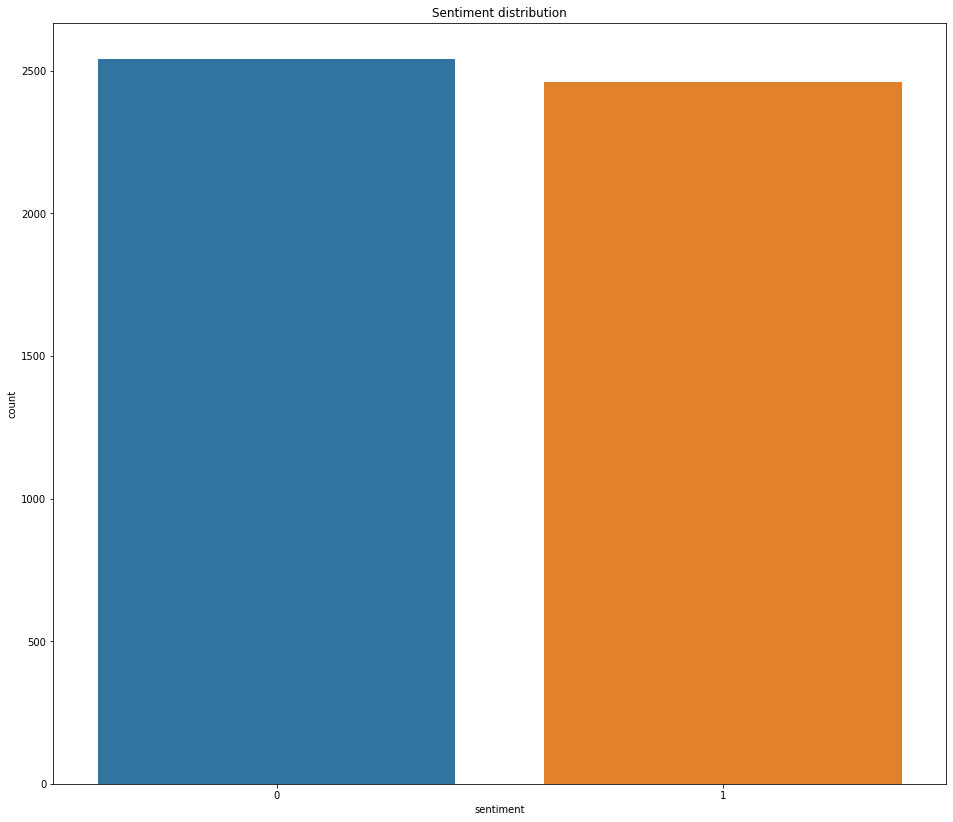

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,14))
sns.countplot(x='sentiment',data=tweets5000).set_title('Sentiment distribution')

In [192]:
#from this we can see the most common words . We can see that stopwords are still included.
from collections import Counter
tweets5000['temp_list'] = tweets5000['tweet'].apply(lambda x:str(x).split())
top = Counter([item for sublist in tweets5000['temp_list'] for item in sublist])
common = pd.DataFrame(top.most_common(20))
common.columns = ['Common words','count']
common.style.background_gradient(cmap='Greens')

,Common words,count
0,i,3013
1,to,1791
2,the,1549
3,a,1152
4,my,1012
5,you,948
6,and,944
7,it,925
8,for,709
9,is,703


In [193]:
#preprocessing tweets final step removing stopwords
from gensim.parsing.preprocessing import remove_stopwords

In [194]:
#stopword removal function
def stopword_removal(row):
    tweet = row['tweet']
    tweet = remove_stopwords(tweet)
    return tweet
tweets5000['tweet'] = tweets5000.apply(stopword_removal, axis=1)
tweets5000.head(5)

,sentiment,tweet,temp_list
1401505,1,good morning,"[good, morning, how, are, you]"
1278596,1,yyeppp gravity nokia learn think,"[yyeppp, except, for, gravity, on, the, nokia,..."
613292,0,feeling want home,"[i, am, not, feeling, well, at, all, i, want, ..."
135113,0,class rey,"[computer, class, with, no, rey]"
1072723,1,need wait hear times official parties plan m w...,"[i, just, need, to, wait, to, hear, the, times..."


In [195]:
#removing shortwords
tweets5000['tweet']=tweets5000['tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
tweets5000.head(5)

,sentiment,tweet,temp_list
1401505,1,good morning,"[good, morning, how, are, you]"
1278596,1,yyeppp gravity nokia learn think,"[yyeppp, except, for, gravity, on, the, nokia,..."
613292,0,feeling want home,"[i, am, not, feeling, well, at, all, i, want, ..."
135113,0,class,"[computer, class, with, no, rey]"
1072723,1,need wait hear times official parties plan wai...,"[i, just, need, to, wait, to, hear, the, times..."


In [196]:
#from this we can see the most common words without the stop words
from collections import Counter
tweets5000['temp_list'] = tweets5000['tweet'].apply(lambda x:str(x).split())
top_withoutstop = Counter([item for sublist in tweets5000['temp_list'] for item in sublist])
common_withoutstop = pd.DataFrame(top_withoutstop.most_common(20))
common_withoutstop.columns = ['Common words without stop words','count']
common_withoutstop.style.background_gradient(cmap='Blues')

,Common words without stop words,count
0,good,316
1,like,267
2,going,238
3,quot,220
4,today,213
5,work,194
6,time,187
7,love,182
8,know,181
9,night,164


In [197]:
# Most common words sentiment wise
Positive_list = tweets5000[tweets5000['sentiment']==1]
Negative_list = tweets5000[tweets5000['sentiment']==0]


In [198]:
#Most common positive words
toppos = Counter([item for sublist in Positive_list['temp_list'] for item in sublist])
common_positive = pd.DataFrame(toppos.most_common(20))
common_positive.columns = ['Positive common words','count']
common_positive.style.background_gradient(cmap='Greens')

,Positive common words,count
0,good,220
1,quot,148
2,love,136
3,like,129
4,thanks,106
5,going,102
6,today,98
7,time,92
8,night,89
9,know,88


In [199]:
#Most common negative words
topneg = Counter([item for sublist in Negative_list['temp_list'] for item in sublist])
common_negative = pd.DataFrame(topneg.most_common(20))
common_negative.columns = ['Negative common words','count']
common_negative.style.background_gradient(cmap='Reds')

,Negative common words,count
0,like,138
1,going,136
2,work,132
3,today,115
4,want,112
5,good,96
6,time,95
7,know,93
8,home,91
9,feel,87


In [200]:
import os
from wordcloud import WordCloud
from PIL import Image
d=os.getcwd()
mask = np.array(Image.open(d + '/twitterlogo.jpg'))

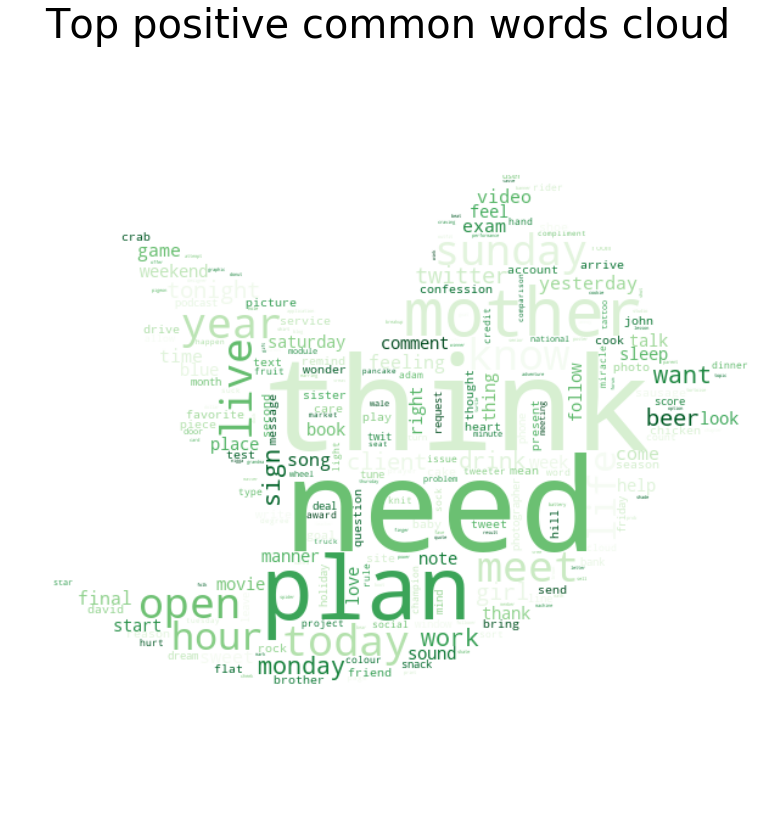

In [201]:
#Top common positive words cloud
wc = WordCloud(background_color="white", max_words=2000,mask=mask,colormap="Greens")
clean_string = ','.join(toppos)
wc.generate(clean_string)

plt.imshow(wc, interpolation='bilinear')
plt.title('Top positive common words cloud', size=40)
plt.axis("off")
plt.gcf().set_size_inches(16, 14)
plt.show()

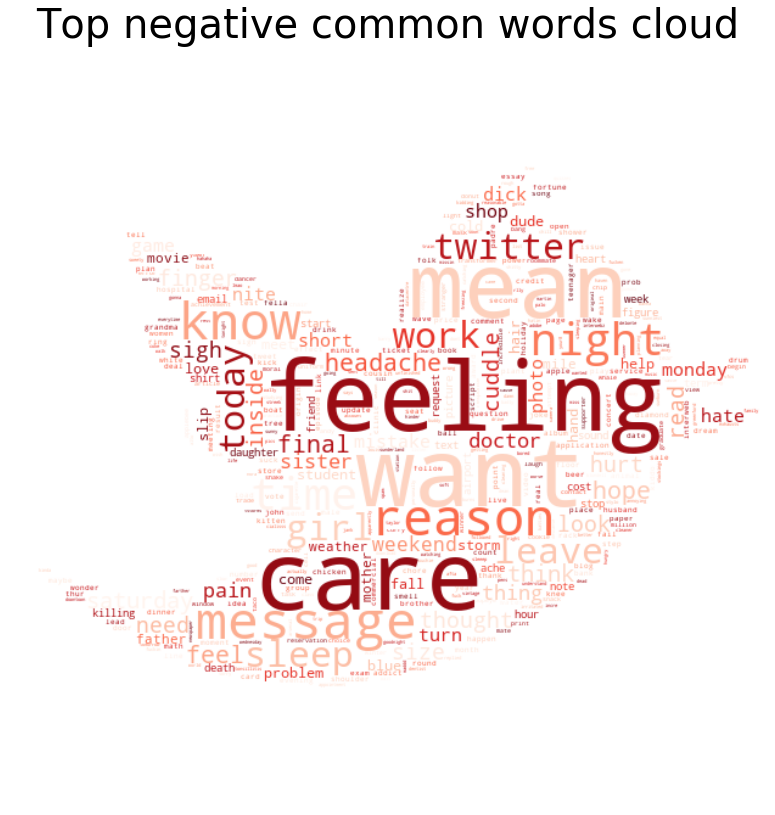

In [202]:
#Top common negative words cloud
wc = WordCloud(background_color="white", max_words=2000, mask=mask,colormap="Reds")
clean_string = ','.join(topneg)
wc.generate(clean_string)

plt.imshow(wc, interpolation='bilinear')
plt.title('Top negative common words cloud', size=40)
plt.axis("off")
plt.gcf().set_size_inches(16, 14)
plt.show()

In [203]:
#tokenization
tokenized_tweet=tweets5000['tweet'].apply(lambda x: x.split())
tokenized_tweet.head(5)

1401505                                      [good, morning]
1278596               [yyeppp, gravity, nokia, learn, think]
613292                                 [feeling, want, home]
135113                                               [class]
1072723    [need, wait, hear, times, official, parties, p...
Name: tweet, dtype: object

In [204]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(tweets5000['tweet'].values.astype('U'))

In [205]:
from sklearn.model_selection import train_test_split
X=text_counts
y=tweets5000['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=19)

# KNN

In [212]:
#KNN
#Here we are calculating cross validation score. As we cannot rely on just one accuracy. Cross validation calculates accuracies 10 times with different samples ,this will give us a good understanding of the actual performance of the model
# We will chose the value with the highest cross validation mean
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import *
k = sqrt(5000)
k=round(k) #k=71

#List Hyperparameters that we want to tune.
n_neighbors = list(range(65,75))#range because we got k=71 for 5000 observations
p=[1,2]


#Convert to dictionary
tuningparameters_knn= dict(n_neighbors=n_neighbors, p=p)

#Create KNN object
knn = KNeighborsClassifier()
knn_best = GridSearchCV(knn, tuningparameters_knn, cv=10)

#Fit the data in the model
best_knn=knn_best.fit(X_train,y_train)

#Printing the best parameters
print('Best p:', best_knn.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_knn.best_estimator_.get_params()['n_neighbors'])

Best p: 2
Best n_neighbors: 72


In [213]:
from sklearn.model_selection import GridSearchCV
grid_search_knn = GridSearchCV(knn,tuningparameters_knn,cv=10,return_train_score=True,n_jobs=-1)
grid_search_knn.fit(X_train,y_train)
print("Test score is = "+str(grid_search_knn.score(X_test,y_test)*100))
print("Best parameters:"+str(grid_search_knn.best_params_))
print("Best grid search score:"+str(grid_search_knn.best_score_))
print("Best estimator:"+str(grid_search_knn.best_estimator_))

Test score is = 62.1
Best parameters:{'n_neighbors': 72, 'p': 2}
Best grid search score:0.62025
Best estimator:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=72, p=2,
                     weights='uniform')


In [214]:
#bestmodel accuracies
best_model_knn=KNeighborsClassifier(n_neighbors=72,p=2)
best_model_knn.fit(X_train,y_train)
#using the best parameters to calculate the accuracies
cross_knn = cross_val_score(best_model_knn, X, y,n_jobs = -1)
print("Cross Validation score = ",cross_knn)                     
print ("Train accuracy ={:.2f}%".format(best_model_knn.score(X_train,y_train)*100))
print ("Test accuracy ={:.2f}%".format(best_model_knn.score(X_test,y_test)*100))
train_acc_knn=best_model_knn.score(X_train,y_train)
test_acc_knn=best_model_knn.score(X_test,y_test)

Cross Validation score =  [0.622 0.627 0.548 0.584 0.578]
Train accuracy =70.38%
Test accuracy =62.10%


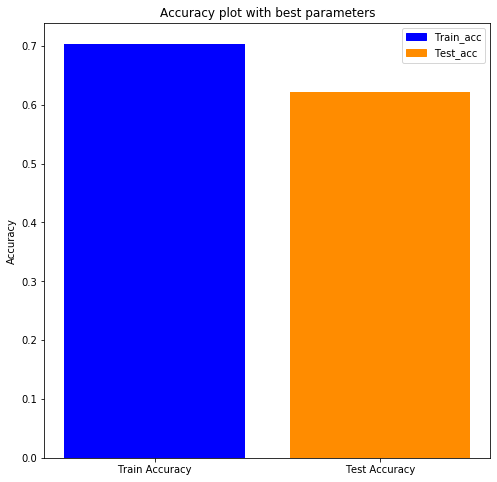

In [278]:
#plotting the best parameters
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
data_knn = [train_acc_knn,test_acc_knn]
labels = ['Train Accuracy','Test Accuracy']
plt.xticks(range(len(data_knn)), labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot with best parameters')
plt.bar(range(len(data_knn)), data_knn,color=['blue','darkorange']) 
Train_acc = mpatches.Patch(color='blue', label='Train_acc')
Test_acc = mpatches.Patch(color='darkorange', label='Test_acc')
plt.legend(handles=[Train_acc, Test_acc],loc='best')
plt.gcf().set_size_inches(8, 8)
plt.show()

In [216]:
#confusionmatrix 
from sklearn.metrics import *
#Predict test data set
y_pred_knn =best_model_knn.predict(X_test)

#This is the confusion matrix:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_knn))

[[301 183]
 [196 320]]


In [217]:
#classifiction report
#Checking performance our model with classification report
print(classification_report(y_test, y_pred_knn))

#Checking performance our model with ROC Score
roc_score_knn=roc_auc_score(y_test, y_pred_knn)
print("Area Under the Curve = ",roc_score_knn)

              precision    recall  f1-score   support

           0       0.61      0.62      0.61       484
           1       0.64      0.62      0.63       516

    accuracy                           0.62      1000
   macro avg       0.62      0.62      0.62      1000
weighted avg       0.62      0.62      0.62      1000

Area Under the Curve =  0.6210279326029855


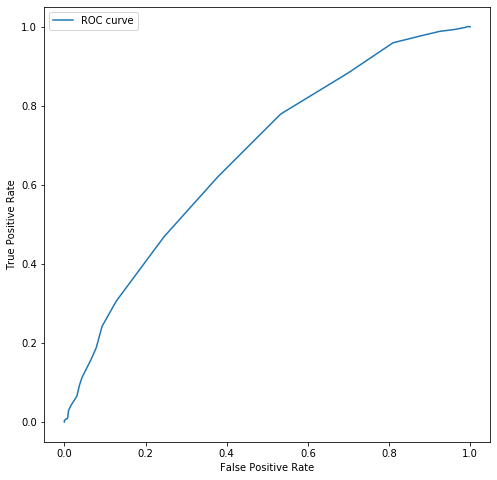

In [218]:
#Drawing the ROC curve 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np
fpr_dt_1, tpr_dt_1,_=roc_curve(y_test,best_model_knn.predict_proba(X_test)[:,1])
plt.plot(fpr_dt_1,tpr_dt_1,label="ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.gcf().set_size_inches(8, 8)
plt.show()

# Logistic Regression

In [222]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import *

#List Hyperparameters that we want to tune.
C = [0.001,0.01,0.1,1,10,100]
penalty=['l1','l2']

#Convert to dictionary
tuningparameters_log= dict(C=C, penalty=penalty)

#Create logistic regression object
logreg =LogisticRegression(random_state=19)
log_best = GridSearchCV(logreg, tuningparameters_log, cv=10)

#Fit the data in the model
best_log=log_best.fit(X_train,y_train)

#Printing the best parameters
print('Best penalty:', best_log.best_estimator_.get_params()['penalty'])
print('Best C_param_range:', best_log.best_estimator_.get_params()['C'])

Best penalty: l2
Best C_param_range: 1


In [223]:
from sklearn.model_selection import GridSearchCV
grid_search_log = GridSearchCV(logreg,tuningparameters_log,cv=10,return_train_score=True,n_jobs=-1)
grid_search_log.fit(X_train,y_train)
print("Test score is = "+str(grid_search_log.score(X_test,y_test)*100),"%")
print("Best parameters:"+str(grid_search_log.best_params_))
print("Best grid search score:"+str(grid_search_log.best_score_))
print("Best estimator:"+str(grid_search_log.best_estimator_))

Test score is = 66.9 %
Best parameters:{'C': 1, 'penalty': 'l2'}
Best grid search score:0.67775
Best estimator:LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=19, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [224]:
#bestmodel accuracies
best_model_log=LogisticRegression(C=1.0,penalty='l2')
best_model_log.fit(X_train,y_train)
#using the best parameters to calculate the accuracies
cross_log = cross_val_score(best_model_log, X, y,n_jobs = -1)
print("Cross Validation score = ",cross_log)                
print ("Train accuracy ={:.2f}%".format(best_model_log.score(X_train,y_train)*100))
print ("Test accuracy ={:.2f}%".format(best_model_log.score(X_test,y_test)*100))
train_acc_log=best_model_log.score(X_train,y_train)
test_acc_log=best_model_log.score(X_test,y_test)

Cross Validation score =  [0.688 0.695 0.688 0.667 0.675]
Train accuracy =92.88%
Test accuracy =66.90%


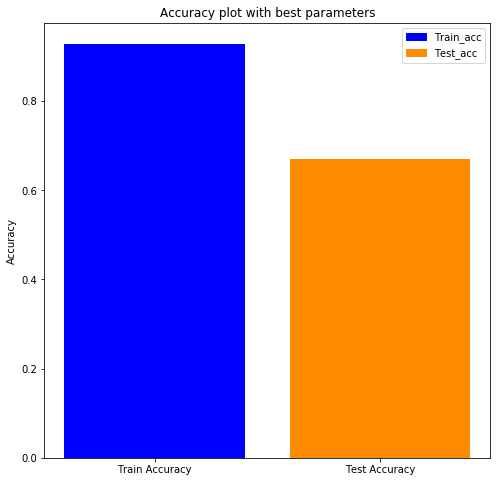

In [279]:
#plotting the best parameters
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
data_log = [train_acc_log,test_acc_log]
labels = ['Train Accuracy','Test Accuracy']
plt.xticks(range(len(data_log)), labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot with best parameters')
plt.bar(range(len(data_log)), data_log,color=['blue','darkorange']) 
Train_acc = mpatches.Patch(color='blue', label='Train_acc')
Test_acc = mpatches.Patch(color='darkorange', label='Test_acc')
plt.legend(handles=[Train_acc, Test_acc],loc='best')
plt.gcf().set_size_inches(8, 8)
plt.show()

In [226]:
#confusionmatrix 
from sklearn.metrics import *
#Predict test data set
y_pred_log =best_model_log.predict(X_test)

#This is the confusion matrix:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_log))

[[315 169]
 [162 354]]


In [227]:
#Checking performance our model with classification report
print(classification_report(y_test, y_pred_log))

#Checking performance our model with ROC Score
roc_score_log=roc_auc_score(y_test, y_pred_log)
print("Area Under the Curve = ",roc_score_log)

              precision    recall  f1-score   support

           0       0.66      0.65      0.66       484
           1       0.68      0.69      0.68       516

    accuracy                           0.67      1000
   macro avg       0.67      0.67      0.67      1000
weighted avg       0.67      0.67      0.67      1000

Area Under the Curve =  0.6684364789544494


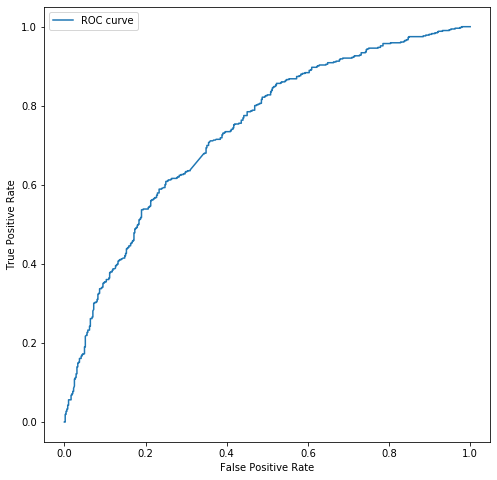

In [228]:
#Drawing the ROC curve 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np
fpr_dt_1, tpr_dt_1,_=roc_curve(y_test,best_model_log.predict_proba(X_test)[:,1])
plt.plot(fpr_dt_1,tpr_dt_1,label="ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.gcf().set_size_inches(8, 8)
plt.show()

# Random Forest

In [229]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import *

#List Hyperparameters that we want to tune.
n_estimators =[5,7,9,11]
max_depth=[3,4,5]
max_leaf_nodes=[10,15,20]
min_samples_split=[10,15,20,25]

#Convert to dictionary
tuningparameters_rand= dict(max_depth=max_depth,max_leaf_nodes=max_leaf_nodes,min_samples_split=min_samples_split,n_estimators=n_estimators, )

#Create randomforest object
clf_rand=RandomForestClassifier(random_state=19)
clf_rand_best = GridSearchCV(clf_rand, tuningparameters_rand, cv=10)

#Fit the data in the model
best_clf_rand=clf_rand_best.fit(X_train,y_train)

In [231]:
#Printing the best parameters
from sklearn.model_selection import GridSearchCV
grid_search_clf = GridSearchCV(clf_rand,tuningparameters_rand,cv=10,return_train_score=True,n_jobs=-1)
grid_search_clf.fit(X_train,y_train)
print("Test score is = "+str(grid_search_clf.score(X_test,y_test)*100),"%")
print("Best parameters:"+str(grid_search_clf.best_params_))
print("Best grid search score:"+str(grid_search_clf.best_score_))
print("Best estimator:"+str(grid_search_clf.best_estimator_))

Test score is = 54.400000000000006 %
Best parameters:{'max_depth': 5, 'max_leaf_nodes': 15, 'min_samples_split': 15, 'n_estimators': 11}
Best grid search score:0.57375
Best estimator:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=15, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=19, verbose=0,
                       warm_start=False)


In [232]:
#bestmodel accuracies
best_model_clf=RandomForestClassifier(max_depth=5,max_leaf_nodes=15,min_samples_split=15,n_estimators=11,random_state=19)
best_model_clf.fit(X_train,y_train)
#using the best parameters to calculate the accuracies
cross_clf = cross_val_score(best_model_clf, X, y,n_jobs = -1)
print("Cross Validation score = ",cross_clf)                
print ("Train accuracy ={:.2f}%".format(best_model_clf.score(X_train,y_train)*100))
print ("Test accuracy ={:.2f}%".format(best_model_clf.score(X_test,y_test)*100))
train_acc_clf=best_model_clf.score(X_train,y_train)
test_acc_clf=best_model_clf.score(X_test,y_test)

Cross Validation score =  [0.59  0.578 0.573 0.558 0.566]
Train accuracy =59.08%
Test accuracy =54.40%


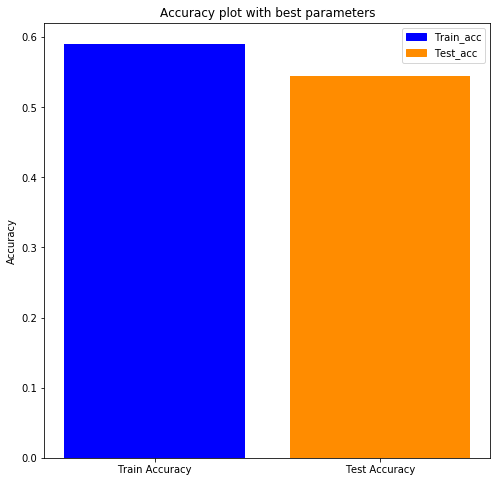

In [280]:
#plotting the best parameters
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
data_clf = [train_acc_clf,test_acc_clf]
labels = ['Train Accuracy','Test Accuracy']
plt.xticks(range(len(data_clf)), labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot with best parameters')
plt.bar(range(len(data_clf)), data_clf,color=['blue','darkorange']) 
Train_acc = mpatches.Patch(color='blue', label='Train_acc')
Test_acc = mpatches.Patch(color='darkorange', label='Test_acc')
plt.legend(handles=[Train_acc, Test_acc],loc='best')
plt.gcf().set_size_inches(8, 8)
plt.show()

In [234]:
#confusionmatrix 
from sklearn.metrics import *
#Predict test data set
y_pred_clf =best_model_clf.predict(X_test)

#This is the confusion matrix:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_clf))

[[463  21]
 [435  81]]


In [235]:
#Checking performance our model with classification report
print(classification_report(y_test, y_pred_clf))

#Checking performance our model with ROC Score
roc_score_clf=roc_auc_score(y_test, y_pred_clf)
print("Area Under the Curve = ",roc_score_clf)

              precision    recall  f1-score   support

           0       0.52      0.96      0.67       484
           1       0.79      0.16      0.26       516

    accuracy                           0.54      1000
   macro avg       0.65      0.56      0.47      1000
weighted avg       0.66      0.54      0.46      1000

Area Under the Curve =  0.5567941572169902


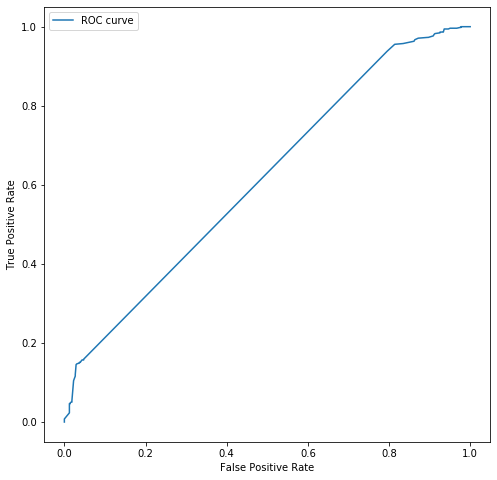

In [236]:
#Drawing the ROC curve 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np
fpr_dt_1, tpr_dt_1,_=roc_curve(y_test,best_model_clf.predict_proba(X_test)[:,1])
plt.plot(fpr_dt_1,tpr_dt_1,label="ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.gcf().set_size_inches(8, 8)
plt.show()

# XGBoost 

In [237]:
#XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import *

#List Hyperparameters that we want to tune.
learning_rate=[0.05, 0.10, 0.15, 0.20] 
max_depth=[ 3]
gamma=[ 0.0, 0.1, 0.2 , 0.3]

#Convert to dictionary
tuningparameters_xg= dict(learning_rate=learning_rate, max_depth=max_depth,gamma=gamma)

#Create xgboost object
model_xg=XGBClassifier(random_state=19)
model_xg_best = GridSearchCV(model_xg, tuningparameters_xg, cv=10)

#Fit the data in the model
best_model_xg=model_xg_best.fit(X_train,y_train)

In [240]:
#Printing the best parameters
from sklearn.model_selection import GridSearchCV
grid_search_xg = GridSearchCV(model_xg,tuningparameters_xg,cv=10,return_train_score=True,n_jobs=-1)
grid_search_xg.fit(X_train,y_train)
print("Test score is = "+str(grid_search_xg.score(X_test,y_test)*100),"%")
print("Best parameters:"+str(grid_search_xg.best_params_))
print("Best grid search score:"+str(grid_search_xg.best_score_))
print("Best estimator:"+str(grid_search_xg.best_estimator_))

Test score is = 60.4 %
Best parameters:{'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 3}
Best grid search score:0.6435000000000001
Best estimator:XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=19, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [241]:
#bestmodel accuracies
best_model_xg=XGBClassifier(learning_rate=0.2,max_depth=3,gamma=0.2,random_state=19)
best_model_xg.fit(X_train,y_train)
#using the best parameters to calculate the accuracies
cross_xg = cross_val_score(best_model_xg, X, y,n_jobs = -1)
print("Cross Validation score = ",cross_xg)                
print ("Train accuracy ={:.2f}%".format(best_model_xg.score(X_train,y_train)*100))
print ("Test accuracy ={:.2f}%".format(best_model_xg.score(X_test,y_test)*100))
train_acc_xg=best_model_xg.score(X_train,y_train)
test_acc_xg=best_model_xg.score(X_test,y_test)

Cross Validation score =  [0.668 0.621 0.65  0.649 0.633]
Train accuracy =68.75%
Test accuracy =60.40%


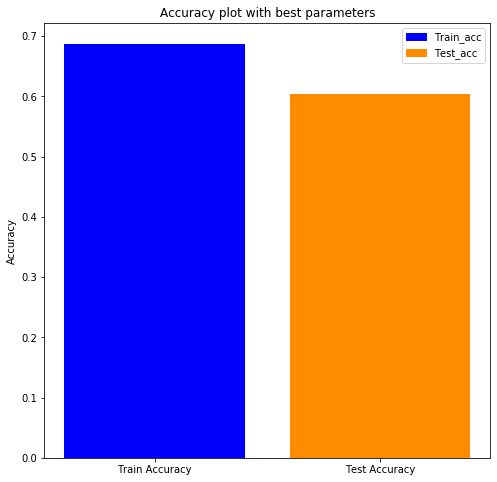

In [281]:
#plotting the best parameters
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
data_xg = [train_acc_xg,test_acc_xg]
labels = ['Train Accuracy','Test Accuracy']
plt.xticks(range(len(data_xg)), labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot with best parameters')
plt.bar(range(len(data_xg)), data_xg,color=['blue','darkorange']) 
Train_acc = mpatches.Patch(color='blue', label='Train_acc')
Test_acc = mpatches.Patch(color='darkorange', label='Test_acc')
plt.legend(handles=[Train_acc, Test_acc],loc='best')
plt.gcf().set_size_inches(8, 8)
plt.show()

In [243]:
#confusionmatrix 
from sklearn.metrics import *
#Predict test data set
y_pred_xg =best_model_xg.predict(X_test)

#This is the confusion matrix :
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_xg))

[[409  75]
 [321 195]]


In [244]:
#Checking performance our model with classification report
print(classification_report(y_test, y_pred_xg))

#Checking performance our model with ROC Score
roc_score_xg=roc_auc_score(y_test, y_pred_xg)
print("Area Under the Curve = ",roc_score_xg)

              precision    recall  f1-score   support

           0       0.56      0.85      0.67       484
           1       0.72      0.38      0.50       516

    accuracy                           0.60      1000
   macro avg       0.64      0.61      0.58      1000
weighted avg       0.64      0.60      0.58      1000

Area Under the Curve =  0.6114741495291178


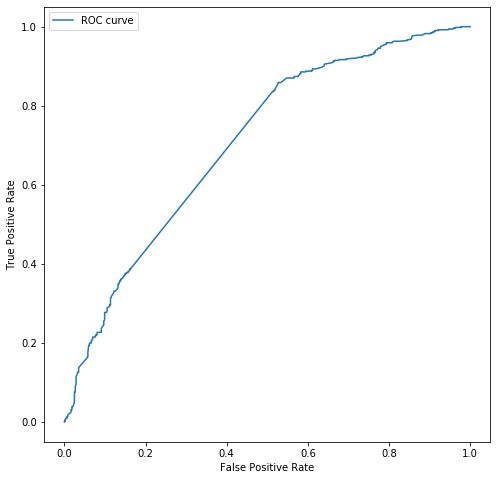

In [245]:
#Drawing the ROC curve 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np
fpr_dt_1, tpr_dt_1,_=roc_curve(y_test,best_model_xg.predict_proba(X_test)[:,1])
plt.plot(fpr_dt_1,tpr_dt_1,label="ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.gcf().set_size_inches(8, 8)
plt.show()

# SVM

In [246]:
#SVM
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import *

#List Hyperparameters that we want to tune.
C=[0.05,0.1,0.2]
kernel=['rbf','linear']
gamma=[0.1,0.2,0.3]

#Convert to dictionary
tuningparameters_svm= dict(C=C,kernel=kernel,gamma=gamma)

#Create svm object
model_svm = svm.SVC(probability=True,random_state=19) 
model_svm_best = GridSearchCV(model_svm, tuningparameters_svm, cv=10,n_jobs=-1)

#Fit the data in the model
best_model_svm=model_svm_best.fit(X_train,y_train)

In [247]:
#Printing the best parameters
from sklearn.model_selection import GridSearchCV
grid_search_svm = GridSearchCV(model_svm,tuningparameters_svm,cv=10,return_train_score=True,n_jobs=-1)
grid_search_svm.fit(X_train,y_train)
print("Test score is = "+str(grid_search_svm.score(X_test,y_test)*100),"%")
print("Best parameters:"+str(grid_search_svm.best_params_))
print("Best grid search score:"+str(grid_search_svm.best_score_))
print("Best estimator:"+str(grid_search_svm.best_estimator_))

Test score is = 67.30000000000001 %
Best parameters:{'C': 0.2, 'gamma': 0.1, 'kernel': 'linear'}
Best grid search score:0.679
Best estimator:SVC(C=0.2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=True, random_state=19, shrinking=True, tol=0.001,
    verbose=False)


In [248]:
#bestmodel accuracies
best_model_svm=svm.SVC(C=0.2,kernel='linear',gamma=0.1,probability=True,random_state=19)
best_model_svm.fit(X_train,y_train)
#using the best parameters to calculate the accuracies
cross_svm = cross_val_score(best_model_svm, X, y,n_jobs = -1)
print("Cross Validation score = ",cross_svm)                
print ("Train accuracy ={:.2f}%".format(best_model_svm.score(X_train,y_train)*100))
print ("Test accuracy ={:.2f}%".format(best_model_svm.score(X_test,y_test)*100))
train_acc_svm=best_model_svm.score(X_train,y_train)
test_acc_svm=best_model_svm.score(X_test,y_test)

Cross Validation score =  [0.676 0.689 0.701 0.679 0.673]
Train accuracy =89.18%
Test accuracy =67.30%


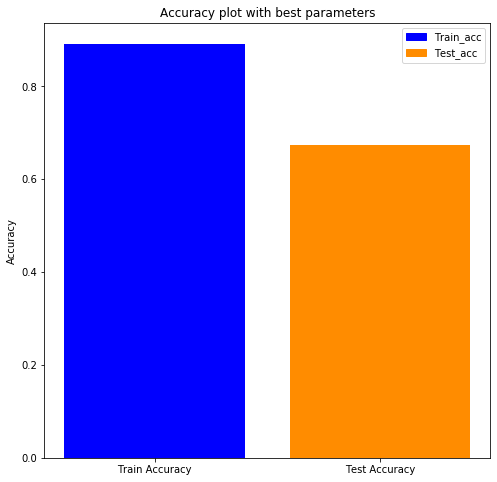

In [282]:
#plotting the best parameters
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
data_svm = [train_acc_svm,test_acc_svm]
labels = ['Train Accuracy','Test Accuracy']
plt.xticks(range(len(data_svm)), labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot with best parameters')
plt.bar(range(len(data_svm)), data_svm,color=['blue','darkorange']) 
Train_acc = mpatches.Patch(color='blue', label='Train_acc')
Test_acc = mpatches.Patch(color='darkorange', label='Test_acc')
plt.legend(handles=[Train_acc, Test_acc],loc='best')
plt.gcf().set_size_inches(8, 8)
plt.show()

In [250]:
#confusionmatrix 
from sklearn.metrics import *
#Predict test data set
y_pred_svm =best_model_svm.predict(X_test)

#This is the confusion matrix :
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_svm))

[[323 161]
 [166 350]]


In [251]:
#Checking performance our model with classification report
print(classification_report(y_test, y_pred_svm))

#Checking performance our model with ROC Score
roc_score_svm=roc_auc_score(y_test, y_pred_svm)
print("Area Under the Curve = ",roc_score_svm)

              precision    recall  f1-score   support

           0       0.66      0.67      0.66       484
           1       0.68      0.68      0.68       516

    accuracy                           0.67      1000
   macro avg       0.67      0.67      0.67      1000
weighted avg       0.67      0.67      0.67      1000

Area Under the Curve =  0.6728249727721186


In [252]:
#Calculating F1, prescision and recall scores
from sklearn.metrics import *

print("F1 score ={:.2f}%".format(f1_score(y_test, y_pred_svm, average="macro")*100))
f1_svm=f1_score(y_test, y_pred_svm, average="macro")
print("Precision score ={:.2f}%".format(precision_score(y_test, y_pred_svm, average="macro")*100))
precision_svm=precision_score(y_test, y_pred_svm, average="macro")
print("Recall score ={:.2f}%".format(recall_score(y_test, y_pred_svm, average="macro")*100))  
recall_svm=recall_score(y_test, y_pred_svm, average="macro")

F1 score =67.28%
Precision score =67.27%
Recall score =67.28%


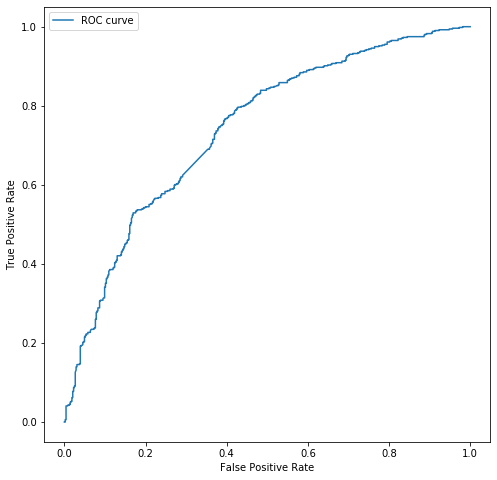

In [253]:
#Drawing the ROC curve 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np
fpr_dt_1, tpr_dt_1,_=roc_curve(y_test,best_model_svm.predict_proba(X_test)[:,1])
plt.plot(fpr_dt_1,tpr_dt_1,label="ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.gcf().set_size_inches(8, 8)
plt.show()

# Naive Bayes

In [259]:
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import *
cnb = ComplementNB()
cnb.fit(X_train, y_train)
cross_cnb = cross_val_score(cnb, X, y,n_jobs = -1)
print("Cross Validation score = ",cross_cnb)                
print ("Train accuracy ={:.2f}%".format(cnb.score(X_train,y_train)*100))
print ("Test accuracy ={:.2f}%".format(cnb.score(X_test,y_test)*100))
train_acc_cnb=cnb.score(X_train,y_train)
test_acc_cnb=cnb.score(X_test,y_test)

Cross Validation score =  [0.677 0.695 0.682 0.681 0.679]
Train accuracy =90.50%
Test accuracy =67.50%


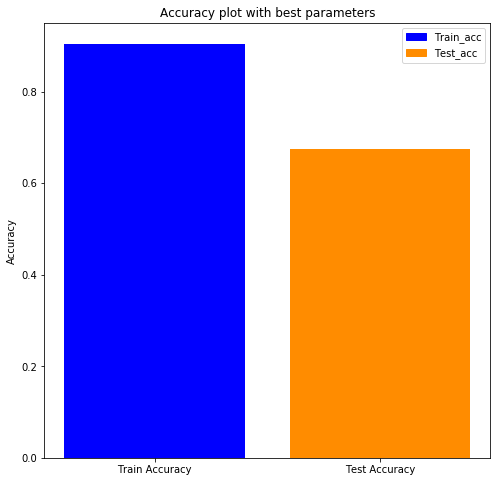

In [283]:
#plotting the best parameters
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
data_cnb = [train_acc_cnb,test_acc_cnb]
labels = ['Train Accuracy','Test Accuracy']
plt.xticks(range(len(data_cnb)), labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot with best parameters')
plt.bar(range(len(data_cnb)), data_cnb,color=['blue','darkorange']) 
Train_acc = mpatches.Patch(color='blue', label='Train_acc')
Test_acc = mpatches.Patch(color='darkorange', label='Test_acc')
plt.legend(handles=[Train_acc, Test_acc],loc='best')
plt.gcf().set_size_inches(8, 8)
plt.show()

In [261]:
#confusionmatrix 
from sklearn.metrics import *
#Predict test data set
y_pred_cnb =cnb.predict(X_test)

#This is the confusion matrix :
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_cnb))

[[324 160]
 [165 351]]


In [262]:
#Checking performance our model with classification report
print(classification_report(y_test, y_pred_cnb))

#Checking performance our model with ROC Score
roc_score_cnb=roc_auc_score(y_test, y_pred_cnb)
print("Area Under the Curve = ",roc_score_cnb)

              precision    recall  f1-score   support

           0       0.66      0.67      0.67       484
           1       0.69      0.68      0.68       516

    accuracy                           0.68      1000
   macro avg       0.67      0.67      0.67      1000
weighted avg       0.68      0.68      0.68      1000

Area Under the Curve =  0.6748270228714203


In [263]:
#Calculating F1, prescision and recall scores
from sklearn.metrics import *

print("F1 score ={:.2f}%".format(f1_score(y_test, y_pred_cnb, average="macro")*100))
f1_cnb=f1_score(y_test, y_pred_cnb, average="macro")
print("Precision score ={:.2f}%".format(precision_score(y_test, y_pred_cnb, average="macro")*100))
precision_cnb=precision_score(y_test, y_pred_cnb, average="macro")
print("Recall score ={:.2f}%".format(recall_score(y_test, y_pred_cnb, average="macro")*100))  
recall_cnb=recall_score(y_test, y_pred_cnb, average="macro")

F1 score =67.48%
Precision score =67.47%
Recall score =67.48%


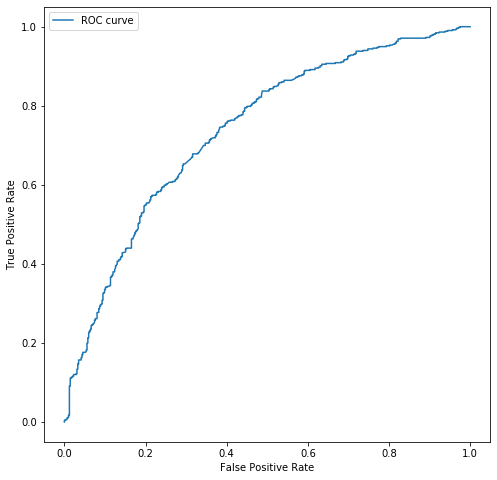

In [264]:
#Drawing the ROC curve 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np
fpr_dt_1, tpr_dt_1,_=roc_curve(y_test,cnb.predict_proba(X_test)[:,1])
plt.plot(fpr_dt_1,tpr_dt_1,label="ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.gcf().set_size_inches(8, 8)
plt.show()

# Comparing the accuracies of all algortihms

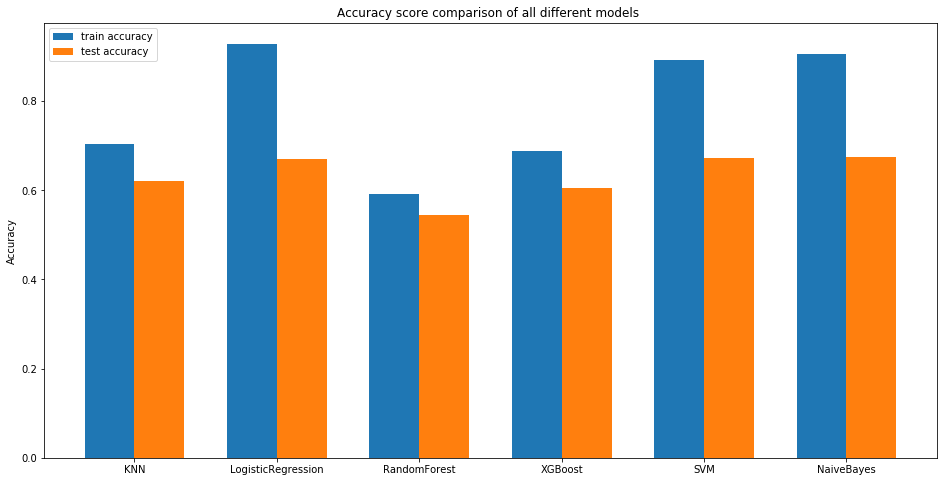

In [277]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# set width of bar
#barWidth = 0.25

train_accuracies = [train_acc_knn,train_acc_log,train_acc_clf,train_acc_xg,train_acc_svm,train_acc_cnb]
test_accuracies  = [test_acc_knn,test_acc_log,test_acc_clf,test_acc_xg,test_acc_svm,test_acc_cnb]

labels = ['KNN', 'LogisticRegression', 'RandomForest','XGBoost','SVM','NaiveBayes']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rec1 = ax.bar(x - width/2, train_accuracies, width, label='train accuracy')
rec2 = ax.bar(x + width/2, test_accuracies, width, label='test accuracy')


ax.set_ylabel('Accuracy')
ax.set_title('Accuracy score comparison of all different models ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='best')

plt.gcf().set_size_inches(16, 8)
plt.show()

# Comparing the accuracy, F1, precison and recall scores of the two best performing algorithms (Naive Bayes and SVM

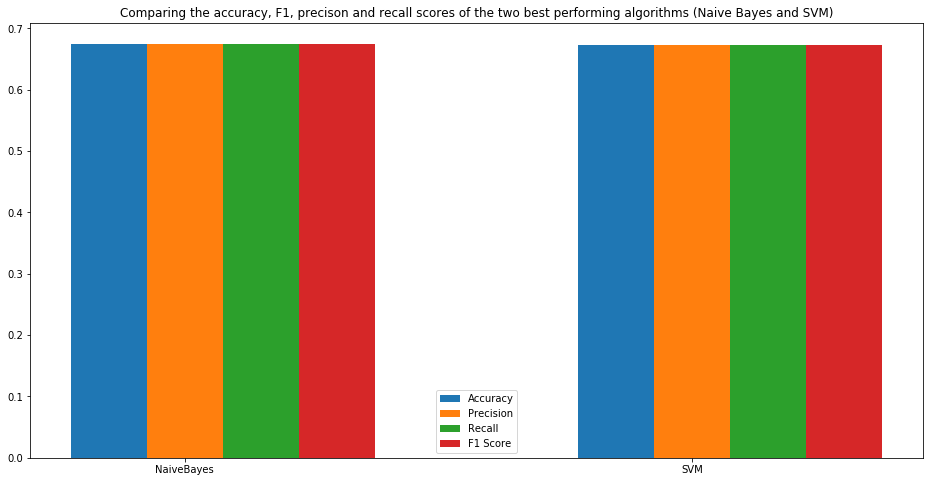

In [284]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# set width of bar
#barWidth = 0.25

test_accuracies  = [test_acc_cnb,test_acc_svm]
precision_scores = [precision_cnb,precision_svm]
recall_scores = [recall_cnb,recall_svm]
f1_scores = [f1_cnb,f1_svm]

labels = ['NaiveBayes','SVM']
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rec1 = ax.bar(x , test_accuracies, width, label='Accuracy')
rec2 = ax.bar(x + width, precision_scores, width, label='Precision')
rec3 = ax.bar(x + width*2, recall_scores, width, label='Recall')
rec4 = ax.bar(x + width*3, f1_scores, width, label='F1 Score')


ax.set_title('Comparing the accuracy, F1, precison and recall scores of the two best performing algorithms (Naive Bayes and SVM)')
ax.set_xticks(x+width)
ax.set_xticklabels(labels)
ax.legend(loc='best')

plt.gcf().set_size_inches(16, 8)
plt.show()

In [329]:
import os
from wordcloud import WordCloud
from PIL import Image
d=os.getcwd()
mask = np.array(Image.open(d + '/thankyou.jpg'))

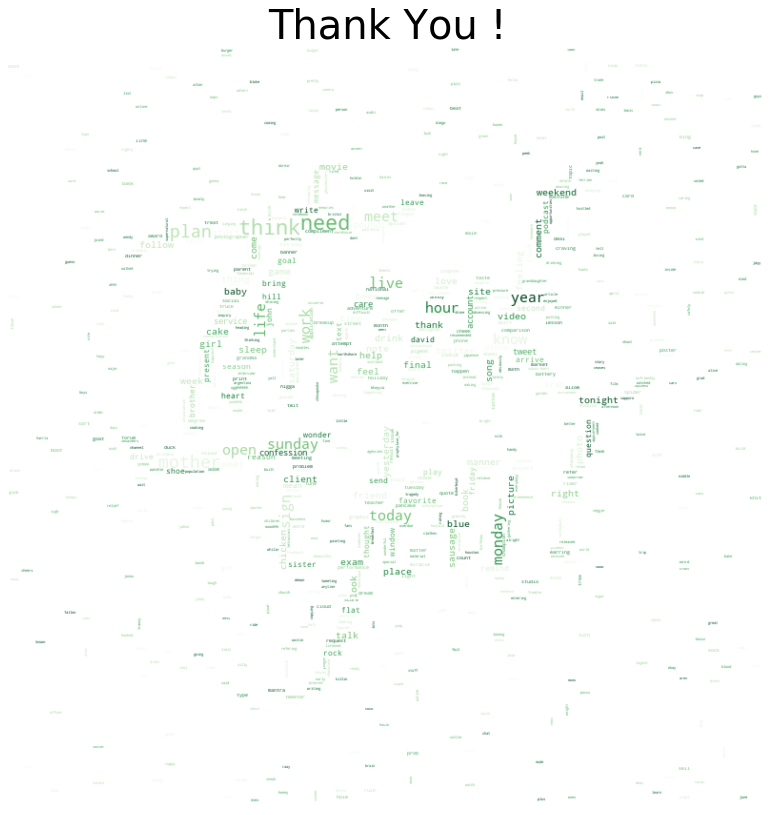

In [335]:
#Top common positive words cloud
wc = WordCloud(background_color="white", max_words=1000,mask=mask,colormap="Greens")
clean_string = ','.join(toppos)
wc.generate(clean_string)

plt.imshow(wc, interpolation='bilinear')
plt.title('Thank You !', size=40)
plt.axis("off")
plt.gcf().set_size_inches(16, 14)
plt.show()